In [1]:
import pandas as pd
import matplotlib.pyplot as plt;
import numpy as np
import matplotlib as mpl
import seaborn as sns
from collections import Counter
import missingno as msno
from sklearn.ensemble import RandomForestClassifier
from sklearn import datasets
from sklearn import metrics
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import accuracy_score


In [2]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")


In [3]:
train_temp = train
train_temp = train_temp.replace(-1, np.NaN)
test_temp = test
test_temp = test_temp.replace(-1, np.NaN)

colwithnan = train_temp.columns[train_temp.isnull().any()].tolist()
colwithnan

['ps_ind_02_cat',
 'ps_ind_04_cat',
 'ps_ind_05_cat',
 'ps_reg_03',
 'ps_car_01_cat',
 'ps_car_02_cat',
 'ps_car_03_cat',
 'ps_car_05_cat',
 'ps_car_07_cat',
 'ps_car_09_cat',
 'ps_car_11',
 'ps_car_12',
 'ps_car_14']

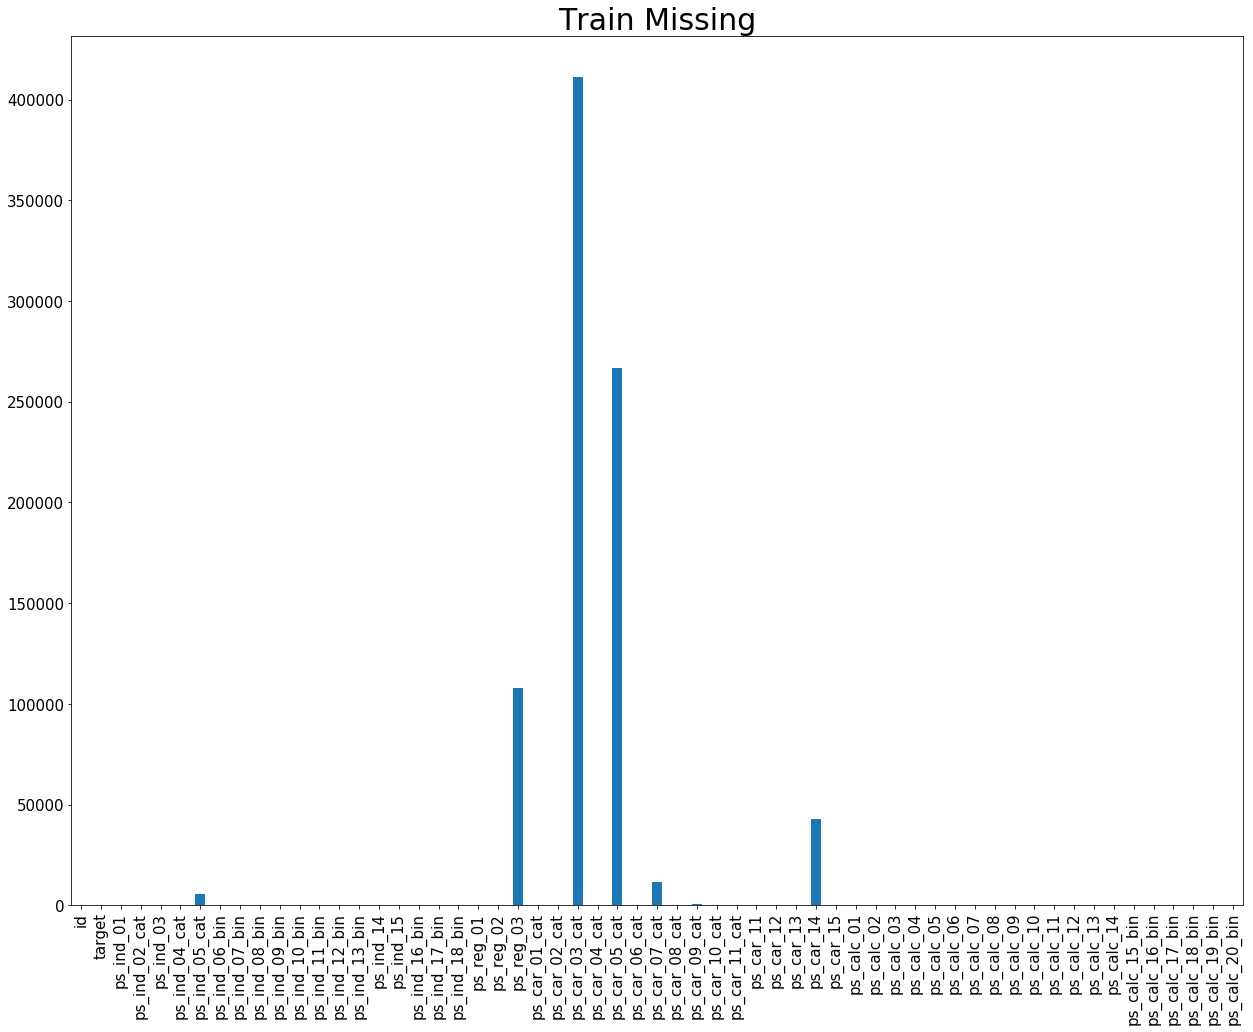

In [4]:
#Training data missing count (bar plot):
train_missing = (train == -1).sum()
plt.rcParams['figure.figsize'] = (21,16)
train_missing.plot.bar()
plt.title('Train Missing', size = 30)
plt.yticks(size = 15)
plt.xticks(size = 15)
#plt.savefig('train_missing.png', bbox_inches = 'tight')

plt.show()
plt.clf()

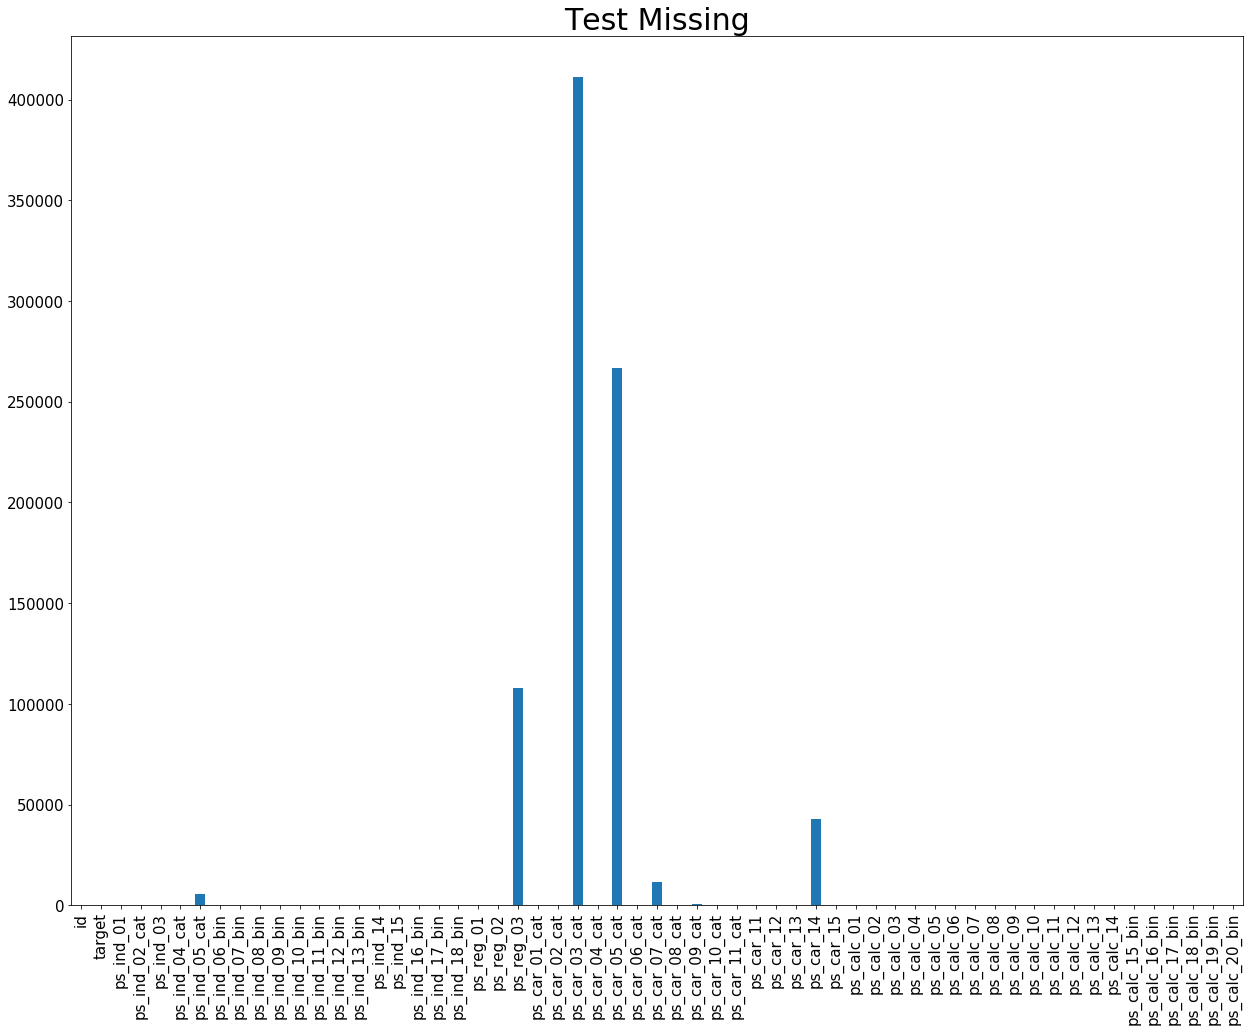

In [5]:
#Test data missing count (bar plot):
test_missing = (train == -1).sum()
plt.rcParams['figure.figsize'] = (21,16)
plt.title('Test Missing', size = 30)
test_missing.plot.bar()
plt.yticks(size = 15)
plt.xticks(size = 15)
#plt.savefig('test_missing.png', bbox_inches = 'tight')
plt.show()
plt.clf()

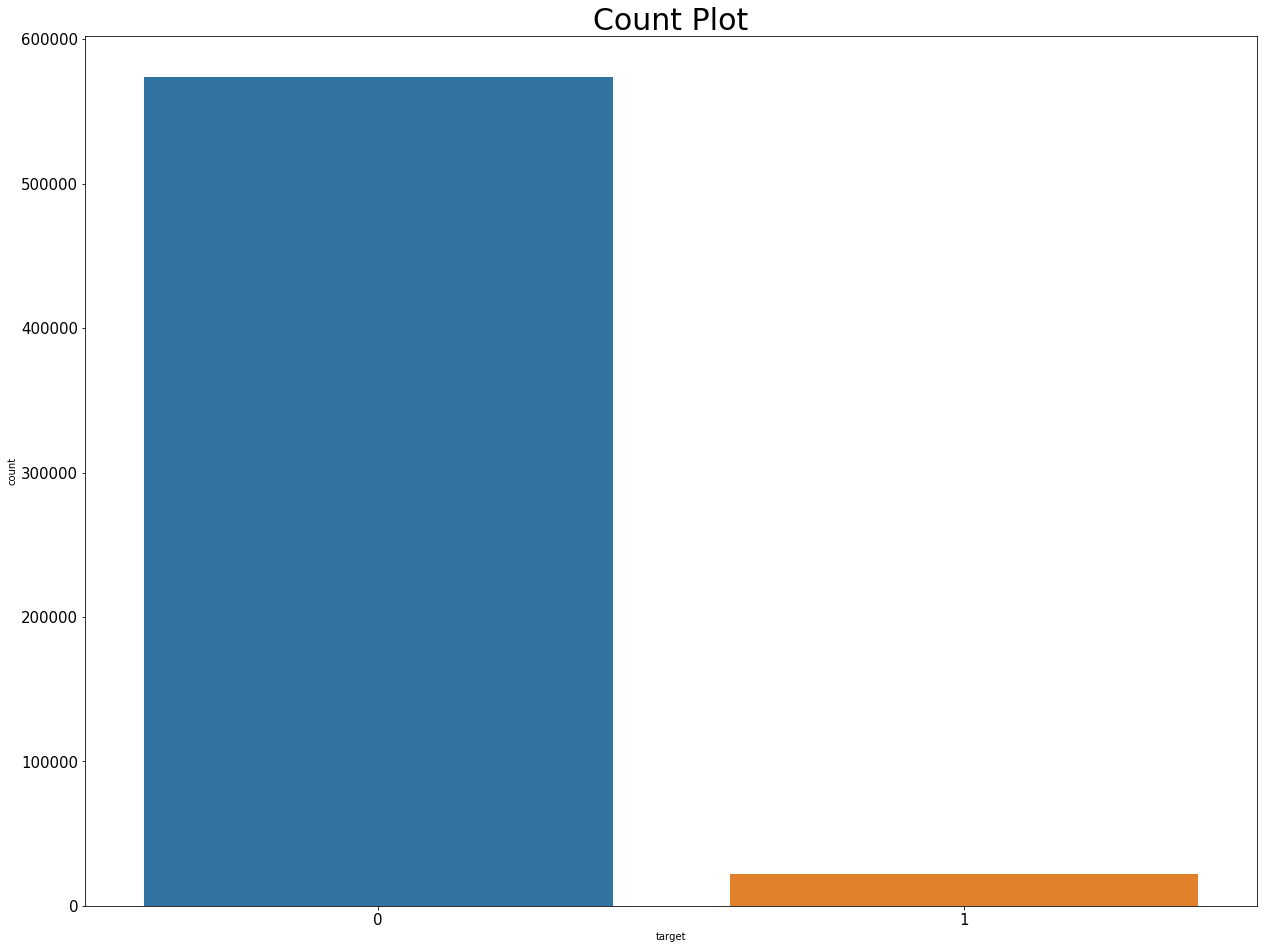

In [6]:
#make a new dataframe for target column to get the idea of how many people made claims and also make the pi chart for it.
#1. Count Plot
count_plot = sns.countplot('target',data=train)
plt.title('Count Plot', size = 30)
plt.yticks(size = 15)
plt.xticks(size = 15)
#plt.savefig('count_plot.png')
plt.show(count_plot)
plt.clf()

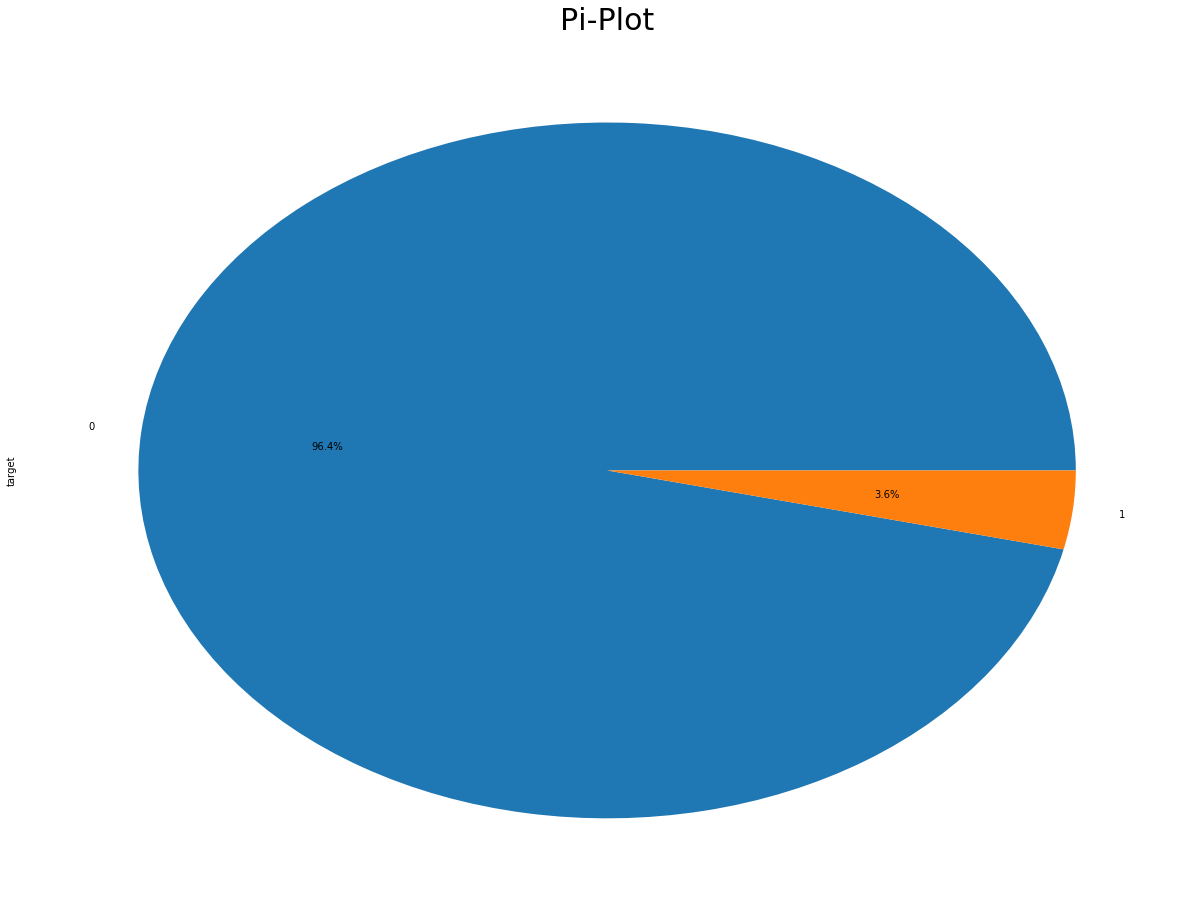

In [7]:
pi_plot = train["target"].value_counts().plot.pie(autopct='%1.1f%%',shadow=False)
plt.title('Pi-Plot', size = 30)
plt.yticks(size = 15)
plt.xticks(size = 15)
#plt.savefig('pi_plot.png')
plt.show()
plt.clf()

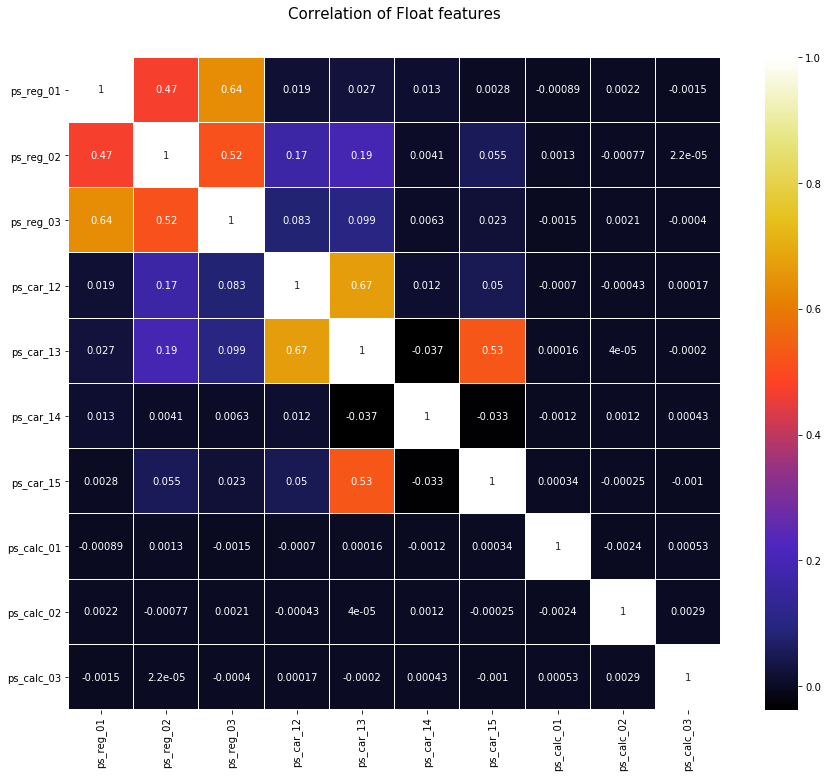

In [8]:
#Heat/Correlation plot for all the float features
all_floats = train[['ps_reg_01', 'ps_reg_02', 'ps_reg_03', 'ps_car_12', 'ps_car_13', 'ps_car_14', 'ps_car_15', 'ps_calc_01', 'ps_calc_02', 'ps_calc_03']].copy()
colormap = plt.cm.CMRmap
plt.figure(figsize=(16,12))
plt.title('Correlation of Float features', y=1.05, size=15)
sns.heatmap(all_floats.corr(),linewidths=0.1,vmax=1.0, square=True, cmap=colormap, linecolor='white', annot=True)
plt.yticks(rotation=0, size = 10)
plt.xticks(rotation=90, size = 10)
#plt.savefig('Float_features.png', dpi = 100)
plt.show()
plt.clf()

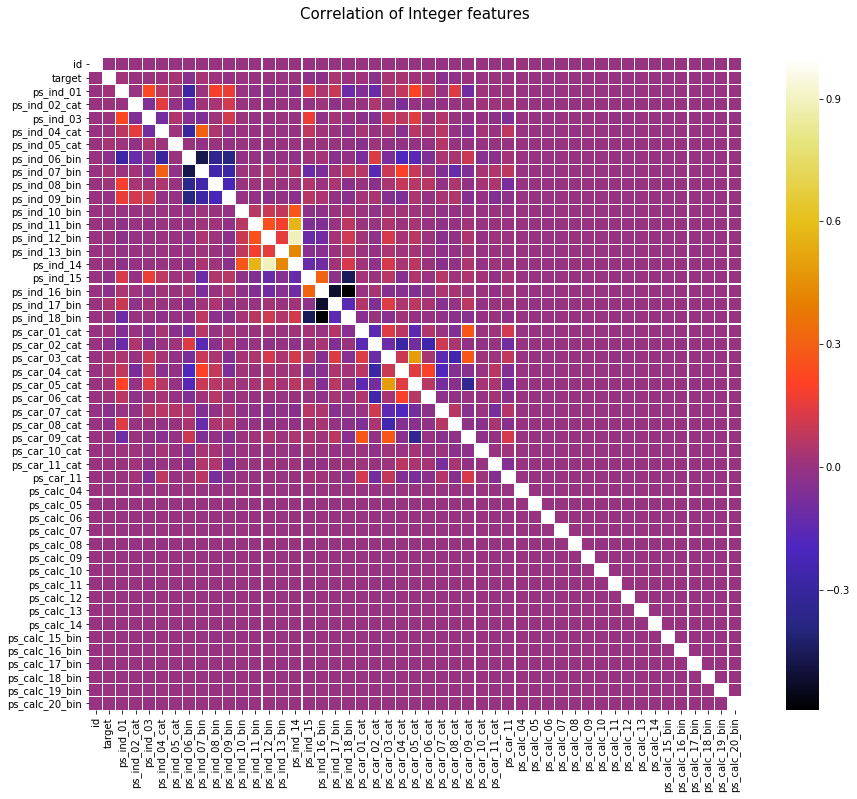

In [9]:
#All integers and get a correlation plot
all_integers = train.drop(all_floats, axis = 1)
colormap = plt.cm.CMRmap
plt.figure(figsize=(16,12))
plt.title('Correlation of Integer features', y=1.05, size=15)
sns.heatmap(all_integers.corr(),linewidths=0.1,vmax=1.0, square=True, cmap=colormap, linecolor='white', annot=False)
plt.yticks(rotation=0, size = 10)
plt.xticks(rotation=90, size = 10)
#plt.savefig('Integer_features.png', dpi = 100)
plt.show()
plt.clf()

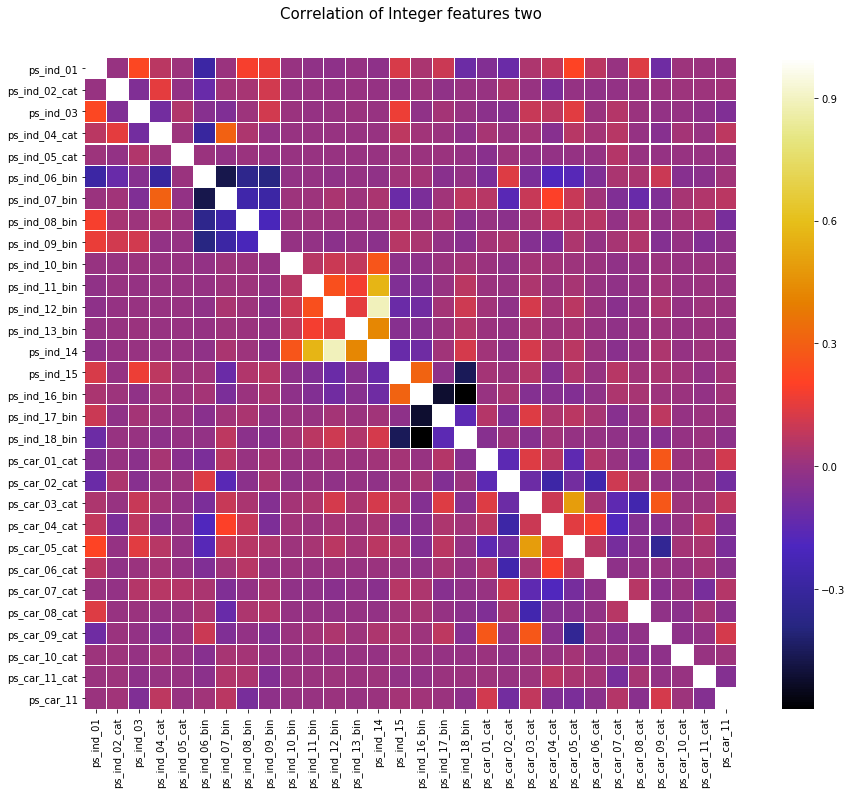

In [10]:
#All integers and get a correlation plot (only necessery ones)
dd = list(all_integers)
dd = dd[2:32]
newInt = all_integers[dd]
colormap = plt.cm.CMRmap
plt.figure(figsize=(16,12))
plt.title('Correlation of Integer features two', y=1.05, size=15)
sns.heatmap(newInt.corr(),linewidths=0.1,vmax=1.0, square=True, cmap=colormap, linecolor='white', annot=False)
plt.yticks(rotation=0, size = 10)
plt.xticks(rotation=90, size = 10)
#plt.savefig('Integer_features_two.png', dpi = 100)
plt.show()
plt.clf()

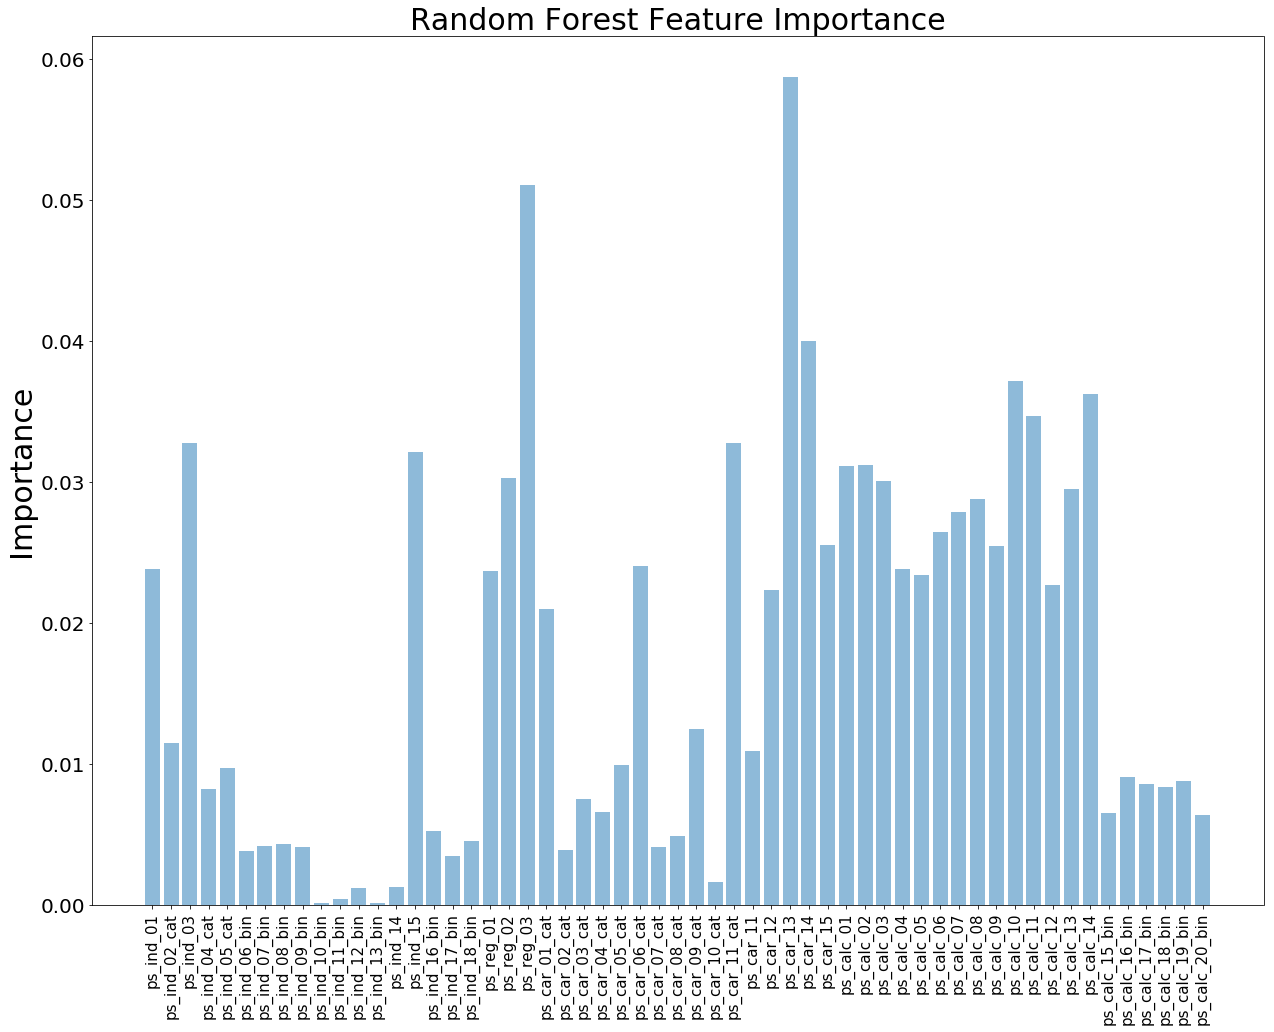

In [11]:
#Random Forest Feature Importance

#Used the below commented out section to get the idea about the importance of the provided features
x_train = train[:400000]
xx = x_train.drop(['id','target'], axis = 1)
yy = x_train['target']
#Remove 'target' from the test data set
Y_test = train[400000:]
Y_test = Y_test.drop(['target'], axis = 1)

clf = RandomForestClassifier(n_jobs=10, random_state=0)
clf.fit(xx, yy)

imp = list(clf.feature_importances_)
imp_names = list(xx)
#imp = pd.DataFrame(imp).T
#imp_names = pd.DataFrame(imp_names).T

#dictionary = dict(zip(imp_names, imp))
#importance = pd.DataFrame(dictionary, index=['i',])

y_pos = np.arange(len(imp_names))
performance = imp
 
plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, tuple(imp_names))
plt.xticks(rotation=90, size = 15)
plt.yticks(rotation = 0, size = 20)
plt.ylabel('Importance', size = 30)
plt.title('Random Forest Feature Importance', size = 30)
plt.show()
#plt.savefig('Importance.png')
plt.clf()